In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Heart Disease Prediction using Machine Learning 


**The goal of this project is to predict the presence of heart disease based on clinical and physiological attributes using multiple machine learning algorithms.The dataset includes factors like age, cholesterol, blood pressure, thalach, oldpeak, and other health indicators that help classify whether a person has heart disease (target = 1) or not (target = 0).**


## Load Dataset

In [58]:
dataset = pd.read_csv(r"C:\Users\Hemalatha P\Desktop\DL\heart-backend\Data\heart.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Check shape & info**

In [59]:
dataset.shape

(1025, 14)

In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [61]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Data Cleaning

**Check Missing Values**

In [62]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**There are no missing values here**

**Check duplicate rows**

In [63]:
dataset.duplicated().sum()

np.int64(723)

**Drop duplicates**

In [64]:
dataset = dataset.drop_duplicates(keep = "first")

In [11]:
dataset.shape

(302, 14)

**Duplicates removed successfully**

**Target Distribution**

In [65]:
target = dataset["target"].value_counts()
print(target)

target
1    164
0    138
Name: count, dtype: int64


In [66]:
healthy = round(target[0]/dataset["target"].count()*100,2)
sick = round(target[1]/dataset["target"].count()*100,2)

print("Percentage of patience without heart problems:",healthy)
print()
print("Percentage of patience with heart problems:", sick)

Percentage of patience without heart problems: 45.7

Percentage of patience with heart problems: 54.3


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
patient = {"target":["healthy","sick"],"percentage":[healthy,sick]}
patient_data = pd.DataFrame(patient)

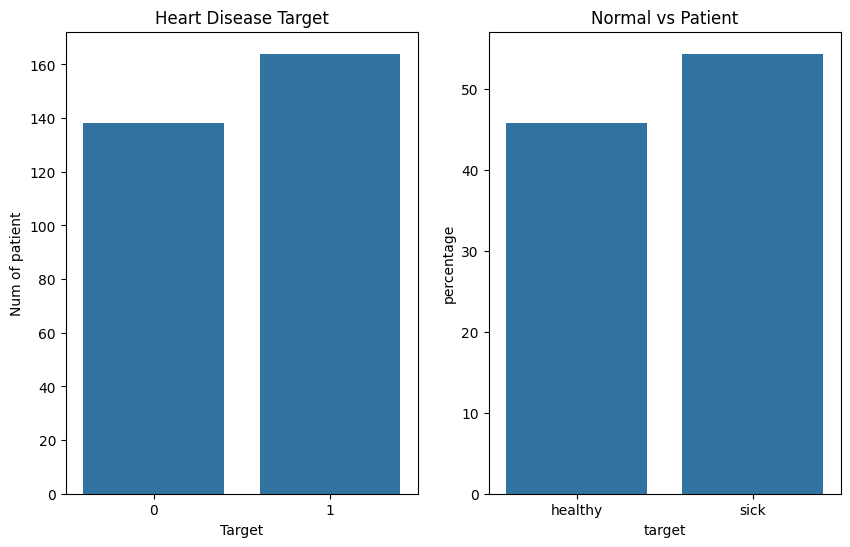

In [69]:
plt.figure(figsize = (10,6))

plt.subplot(1,2,1)
sns.countplot(x = "target", data = dataset)
plt.title("Heart Disease Target")
plt.xlabel("Target")
plt.ylabel("Num of patient")

plt.subplot(1,2,2)
sns.barplot(x="target",y="percentage",data = patient_data )
plt.title("Normal vs Patient")
plt.show()

In [70]:
dataset["sex"].unique()

array([1, 0])

# Here 1 is Male & 0 is Female Patient

In [71]:
sex = dataset["sex"].value_counts()
print(sex)

sex
1    206
0     96
Name: count, dtype: int64


In [72]:
female = round(sex[0]/dataset["sex"].count()*100,2)
male = round(sex[1]/dataset["sex"].count()*100,2)

print("Percentage of female patient :", female)
print()
print("Percentage of male patient :", male)

Percentage of female patient : 31.79

Percentage of male patient : 68.21


**Distribution of heart disease between male and female**

In [73]:
dataset['target'] = ["healthy" if x == 0 else "sick" for x in dataset['target']]
dataset['sex'] = ['Female' if x == 0 else 'Male' for x in dataset['sex']]

In [74]:
dataset.groupby(["sex","target"])["sex"].count()

sex     target 
Female  healthy     24
        sick        72
Male    healthy    114
        sick        92
Name: sex, dtype: int64

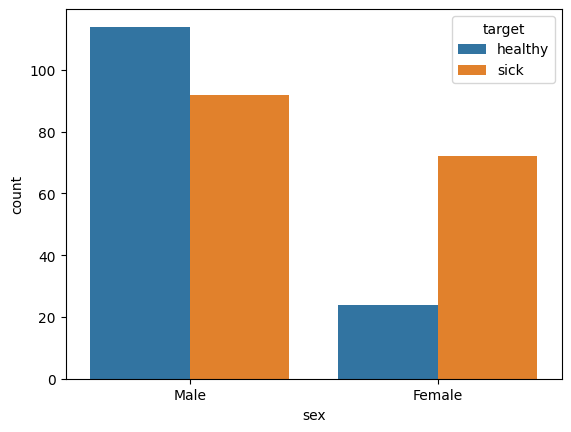

In [75]:
sns.countplot(data = dataset, x= "sex", hue = "target")
plt.show()

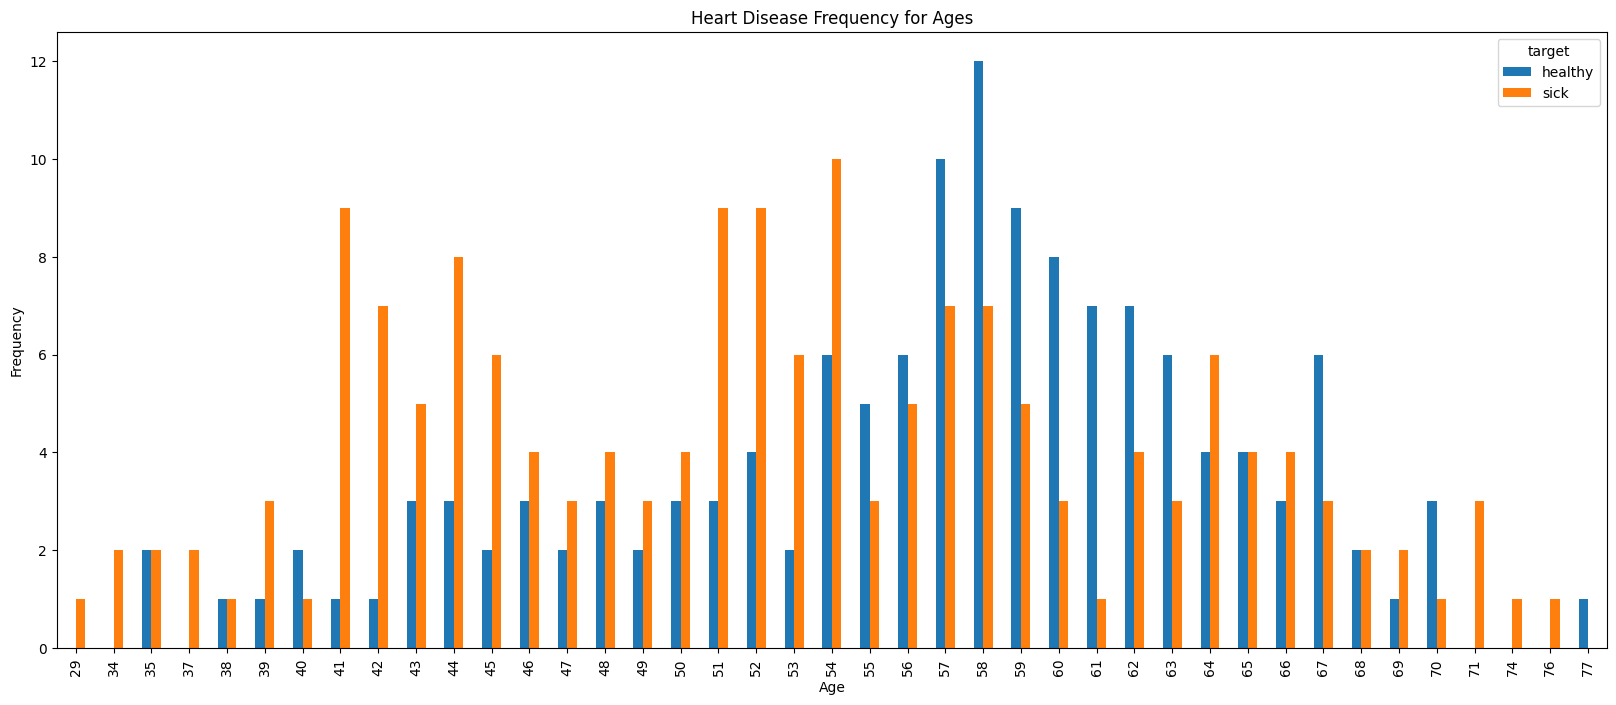

In [76]:
pd.crosstab(dataset.age,dataset.target).plot(kind="bar",figsize=(20,8))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [77]:
dataset.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,0,125,212,0,1,168,0,1.0,2,2,3,healthy
1,53,Male,0,140,203,1,0,155,1,3.1,0,0,3,healthy
2,70,Male,0,145,174,0,1,125,1,2.6,0,0,3,healthy


In [78]:
dataset['sex'] = dataset['sex'].map({'Female': 0, 'Male': 1})
dataset['target'] = dataset['target'].map({'healthy': 0, 'sick': 1})

In [79]:
dataset.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [80]:
target = dataset["target"].value_counts()
print(target)

target
1    164
0    138
Name: count, dtype: int64


**Correlation Heatmap**

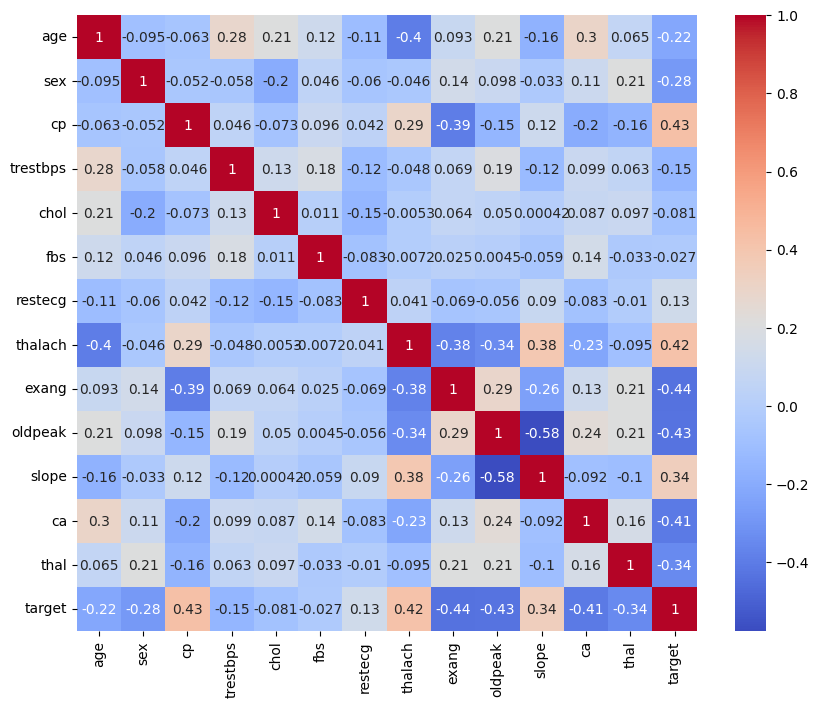

In [81]:
plt.figure(figsize = (10,8))
sns.heatmap(dataset.corr(), annot = True,cmap='coolwarm')
plt.show()

In [82]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Model Training & Evaluation

**Split dataset into features (x) and target (y)**

In [83]:
x = dataset.iloc[:,:-1]
y = dataset["target"]

**Train-Test Split**

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

**Feature Scaling**

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


## XGBoost Classifier Model

In [86]:

"""
from sklearn.model_selection import GridSearchCV
xgb = XGBClassifier(random_state = 42)
grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1],
    'gamma': [0, 0.1, 0.2]
}
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=grid,
    scoring='f1',       
    cv=5,
    verbose=2,
    n_jobs=-1
)
grid_search_xgb.fit(x_train_scaled, y_train)

print("Best Parameters:", grid_search_xgb.best_params_)
best_xgb = grid_search_xgb.best_estimator_

"""

'\nfrom sklearn.model_selection import GridSearchCV\nxgb = XGBClassifier(random_state = 42)\ngrid = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [3, 5, 7, 10],\n    \'learning_rate\': [0.01, 0.05, 0.1, 0.2],\n    \'subsample\': [0.7, 0.8, 1],\n    \'colsample_bytree\': [0.7, 0.8, 1],\n    \'gamma\': [0, 0.1, 0.2]\n}\ngrid_search_xgb = GridSearchCV(\n    estimator=xgb,\n    param_grid=grid,\n    scoring=\'f1\',       \n    cv=5,\n    verbose=2,\n    n_jobs=-1\n)\ngrid_search_xgb.fit(x_train_scaled, y_train)\n\nprint("Best Parameters:", grid_search_xgb.best_params_)\nbest_xgb = grid_search_xgb.best_estimator_\n\n'

In [87]:
from xgboost import XGBClassifier
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 42, colsample_bytree= 0.7, gamma = 0.2, learning_rate = 0.01, max_depth= 7, n_estimators= 200, subsample = 0.7)
xgb.fit(x_train_scaled, y_train)
y_pred_xgb = xgb.predict(x_test_scaled)
y_proba_xgb = xgb.predict_proba(x_test_scaled)[:, 1]

# Save the model and scaler as a pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('scaler', scaler), ('classifier', xgb)])
import joblib
joblib.dump(pipeline, 'heart-backend/models/heart_xgb_pipeline.joblib')

['heart-backend/models/heart_xgb_pipeline.joblib']

**Model Evaluation**

In [88]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb = recall_score(y_test,y_pred_xgb)
f1_xgb = f1_score(y_test,y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test,y_proba_xgb)

In [89]:
print("Precision Score :",round(precision_xgb,3))
print("Recall Score :",round(recall_xgb,3))
print("F1 Score :",round(f1_xgb,3))
print("Roc Auc Score :",round(roc_auc_xgb,3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Precision Score : 0.788
Recall Score : 0.897
F1 Score : 0.839
Roc Auc Score : 0.879

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.79      0.90      0.84        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



**Results**

* **Precision:** 0.788

* * Recall: 0.897

* * F1 Score: 0.839

* **ROC-AUC:** 0.886

* * Accuracy: 84%

 **XGBoost** came very close to Random Forest — slightly lower precision but strong recall and stability. It’s efficient, accurate, and great for real-time prediction scenarios.

**Confusion Matrix Visualization**

In [90]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:\n", cm_xgb)

Confusion Matrix:
 [[25  7]
 [ 3 26]]


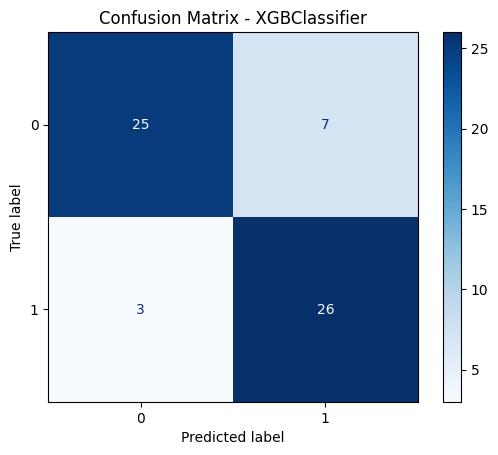

In [91]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - XGBClassifier")
plt.show()

In [46]:
models = ['Logistic Regression', 'KNN', 'Random Forest', 'XGBoost']
precision = [0.75, 0.697, 0.794, 0.788]
recall = [0.724, 0.793, 0.931, 0.897]
f1 = [0.737, 0.742, 0.857, 0.839]
roc_auc = [0.832, 0.839, 0.892, 0.886]

In [47]:
metrics_df = pd.DataFrame({
    'Model': models,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC': roc_auc
})

In [92]:
metrics_df

,Model,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.750,0.724,0.737,0.832
1,KNN,0.697,0.793,0.742,0.839
2,Random Forest,0.794,0.931,0.857,0.892
3,XGBoost,0.788,0.897,0.839,0.886


**Random Forest Classifier** is the best model for this **Heart Disease Prediction dataset**.
It provides the best overall balance between **precision, recall, F1, and ROC-AUC**, ensuring reliable and accurate medical predictions.